In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

In [2]:
df = pd.read_csv("sales_06_FY2020-21 copy.csv")

C:\Users\gauri\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df.dtypes

order_id             object
order_date           object
status               object
item_id               int64
sku                  object
qty_ordered           int64
price               float64
value               float64
discount_amount     float64
total               float64
category             object
payment_method       object
bi_st                object
cust_id               int64
year                  int64
month                object
ref_num               int64
Name Prefix          object
First Name           object
Middle Initial       object
Last Name            object
Gender               object
age                   int64
full_name            object
E Mail               object
Customer Since       object
SSN                  object
Phone No.            object
Place Name           object
County               object
City                 object
State                object
Zip                   int64
Region               object
User Name            object
Discount_Percent    

In [4]:
df.describe()

,item_id,qty_ordered,price,value,discount_amount,total,cust_id,year,ref_num,age,Zip,Discount_Percent
count,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000
mean,741664.902131,3.011296,851.385253,885.879934,70.039427,815.840507,70048.019054,2020.618778,560853.663395,46.489033,49723.160015,6.069079
std,95746.031827,4.573837,1741.750751,2073.252179,256.880870,1983.580302,30243.856395,0.485688,255828.418398,16.673288,27597.198873,10.100100
min,574769.000000,1.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2020.000000,111127.000000,18.000000,210.000000,0.000000
25%,659684.500000,2.000000,49.900000,49.900000,0.000000,49.900000,56519.000000,2020.000000,341265.000000,32.000000,26571.750000,0.000000
50%,742309.000000,2.000000,119.000000,158.970000,0.000000,149.800000,74225.500000,2021.000000,564857.000000,47.000000,49316.000000,0.000000
75%,826124.250000,3.000000,950.000000,910.000000,18.383050,800.000000,92357.000000,2021.000000,781086.000000,61.000000,72645.000000,11.000000
max,905208.000000,501.000000,101262.590000,101262.590000,30213.150000,101262.590000,115326.000000,2021.000000,999981.000000,75.000000,99950.000000,75.000000


In [5]:
df.head(15)

,order_id,order_date,status,item_id,sku,qty_ordered,price,value,discount_amount,total,...,SSN,Phone No.,Place Name,County,City,State,Zip,Region,User Name,Discount_Percent
0,100354678.0,01-10-2020,received,574772,oasis_Oasis-064-36,21,89.9,1798.0,0.00000,1798.00000,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.000000
1,100354678.0,01-10-2020,received,574774,Fantastic_FT-48,11,19.0,190.0,0.00000,190.00000,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.000000
2,100354680.0,01-10-2020,complete,574777,mdeal_DMC-610-8,9,149.9,1199.2,0.00000,1199.20000,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.000000
3,100354680.0,01-10-2020,complete,574779,oasis_Oasis-061-36,9,79.9,639.2,0.00000,639.20000,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.000000
4,100367357.0,13-11-2020,received,595185,MEFNAR59C38B6CA08CD,2,99.9,99.9,0.00000,99.90000,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.000000
5,100367357.0,13-11-2020,received,595186,MEFBUY59B7C3DDC2CA3-42,2,39.9,39.9,0.00000,39.90000,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.000000
6,100367360.0,13-11-2020,order_refunded,595192,MATDAN59C3C845B38F0,2,47.6,47.6,0.00000,47.60000,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.000000
7,100354677.0,01-10-2020,canceled,574769,GFE_19_USBLEDLight,2,49.0,49.0,0.00000,49.00000,...,185-86-4345,239-335-6755,Graham,Bradford,Graham,FL,32042,South,lseaker,0.000000
8,100354677.0,01-10-2020,canceled,574770,oasis_Kingston-32GB-DTIG4,2,135.0,135.0,0.00000,135.00000,...,185-86-4345,239-335-6755,Graham,Bradford,Graham,FL,32042,South,lseaker,0.000000
9,100354677.0,01-10-2020,canceled,574771,Geepas_GSB5420,2,549.9,549.9,0.00000,549.90000,...,185-86-4345,239-335-6755,Graham,Bradford,Graham,FL,32042,South,lseaker,0.000000


In [6]:
df.columns

Index(['order_id', 'order_date', 'status', 'item_id', 'sku', 'qty_ordered',
       'price', 'value', 'discount_amount', 'total', 'category',
       'payment_method', 'bi_st', 'cust_id', 'year', 'month', 'ref_num',
       'Name Prefix', 'First Name', 'Middle Initial', 'Last Name', 'Gender',
       'age', 'full_name', 'E Mail', 'Customer Since', 'SSN', 'Phone No. ',
       'Place Name', 'County', 'City', 'State', 'Zip', 'Region', 'User Name',
       'Discount_Percent'],
      dtype='object')

In [7]:
df['State'].unique()

array(['OK', 'FL', 'ND', 'HI', 'WY', 'GA', 'TN', 'RI', 'IL', 'KY', 'AZ',
       'AR', 'MS', 'NE', 'NJ', 'WV', 'CA', 'MO', 'LA', 'TX', 'MI', 'PA',
       'VA', 'MN', 'MT', 'ME', 'NM', 'IA', 'OH', 'SC', 'NC', 'UT', 'IN',
       'AL', 'VT', 'NY', 'SD', 'CT', 'OR', 'NH', 'CO', 'DC', 'MD', 'ID',
       'KS', 'NV', 'AK', 'WA', 'MA', 'WI', 'DE'], dtype=object)

In [8]:
df.isna().sum().sum()

0

In [9]:
#Creating month column
df["monthNumber"] = df["order_date"].str[5:7]
df[["monthNumber"]]

,monthNumber
0,-2
1,-2
2,-2
3,-2
4,-2
...,...
286387,-2
286388,-2
286389,-2
286390,-2


In [10]:
outliers = df[['qty_ordered', 'price', 'value', 'total']]
outliers = outliers[(np.abs(stats.zscore(outliers)) < 3).all(axis=1)]
outliers

,qty_ordered,price,value,total
1,11,19.0,190.0,190.0
2,9,149.9,1199.2,1199.2
3,9,79.9,639.2,639.2
4,2,99.9,99.9,99.9
5,2,39.9,39.9,39.9
...,...,...,...,...
286387,2,4419.9,4419.9,4419.9
286388,2,39.9,39.9,39.9
286389,2,40.0,40.0,40.0
286390,2,49.9,49.9,49.9


In [11]:
dfGrouped = df[df['order_id'].duplicated(keep=False)]
dfGrouped['grouped'] = df.groupby('order_id')['sku'].transform(lambda x:','.join(x))

dfGrouped = dfGrouped[['order_id', 'grouped']].drop_duplicates()

dfGrouped

C:\Users\gauri\AppData\Local\Temp/ipykernel_19016/607895612.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfGrouped['grouped'] = df.groupby('order_id')['sku'].transform(lambda x:','.join(x))


,order_id,grouped
0,100354678.0,"oasis_Oasis-064-36,Fantastic_FT-48"
2,100354680.0,"mdeal_DMC-610-8,oasis_Oasis-061-36"
4,100367357.0,"MEFNAR59C38B6CA08CD,MEFBUY59B7C3DDC2CA3-42"
7,100354677.0,"GFE_19_USBLEDLight,oasis_Kingston-32GB-DTIG4,G..."
12,100403034.0,"APPWES59CA4D59CB41A,APPPHI5A09939191938,HALSHO..."
...,...,...
286352,100562293,"MATHUA5A804E47B2650,MATUNB5B6764B87AD84,MATBIZ..."
286362,100562337,"HASONC59BA3E209AFCD,HASONC59BA3E256A4D0"
286365,100562314,"WOFFAS5B58935F34C35-34,HASBLA5B0BD24A5D5E3"
286368,100562317,"MEFALH5AC75277ABF28,MEFALH5B0FB4E838301"


In [12]:
from itertools import combinations
from collections import Counter

count = Counter()

for order in dfGrouped['grouped']:
    sub_list = order.split(",")
    count.update(Counter(combinations(sub_list, 2)))

print(count.most_common(5))

[(('KNO59D64DAF36939', 'KNO59D64DAC18B6C'), 103), (('LIF59D62CE49B2A2', 'LUX59D62CE0DE4D2'), 70), (('MATROM59D5F5FAB4036', 'HALWON59F963550067F'), 67), (('MATROM59D5F5FAB4036', 'HALSHO59F82EF537BA1'), 67), (('MATROM59D5F5FAB4036', 'HALSHO59F866BE82DDE'), 67)]


In [13]:
df.columns

Index(['order_id', 'order_date', 'status', 'item_id', 'sku', 'qty_ordered',
       'price', 'value', 'discount_amount', 'total', 'category',
       'payment_method', 'bi_st', 'cust_id', 'year', 'month', 'ref_num',
       'Name Prefix', 'First Name', 'Middle Initial', 'Last Name', 'Gender',
       'age', 'full_name', 'E Mail', 'Customer Since', 'SSN', 'Phone No. ',
       'Place Name', 'County', 'City', 'State', 'Zip', 'Region', 'User Name',
       'Discount_Percent', 'monthNumber'],
      dtype='object')

In [14]:
bins = [2, 4, 13, 20, 65]
labels = ['Kid','Teen','Adult', 'Senior']
df['age_category'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)
df['age_category'].value_counts()

Senior    222475
Adult      10625
Kid            0
Teen           0
Name: age_category, dtype: int64

In [94]:
df[['payment_method', 'age_category', ]].value_counts()

payment_method     age_category
cod                Senior          80343
Easypay            Senior          53855
Payaxis            Senior          23988
easypay_voucher    Senior          23388
bankalfalah        Senior          18033
Easypay_MA         Senior           8910
jazzwallet         Senior           5111
jazzvoucher        Senior           4575
cod                Adult            3696
customercredit     Senior           2795
Easypay            Adult            2691
apg                Senior           1324
Payaxis            Adult            1072
easypay_voucher    Adult            1004
bankalfalah        Adult             750
customercredit     Adult             383
jazzvoucher        Adult             382
Easypay_MA         Adult             343
jazzwallet         Adult             201
mcblite            Senior            150
apg                Adult              94
mcblite            Adult               9
cashatdoorstep     Senior              2
financesettlement  Senior

In [120]:
agevspayment = df.groupby(['age_category', 'payment_method'])[['payment_method']].count()
agevspayment = agevspayment.drop(labels=['Kid', 'Teen'], axis=0)
agevspayment

payment_method
age_category payment_method                   
Adult        Easypay                      2691
             Easypay_MA                    343
             Payaxis                      1072
             apg                            94
             bankalfalah                   750
             cashatdoorstep                  0
             cod                          3696
             customercredit                383
             easypay_voucher              1004
             financesettlement               0
             jazzvoucher                   382
             jazzwallet                    201
             mcblite                         9
Senior       Easypay                     53855
             Easypay_MA                   8910
             Payaxis                     23988
             apg                          1324
             bankalfalah                 18033
             cashatdoorstep                  2
             cod                         80343
             customercredit               2795
             easypay_voucher             23388
             financesettlement               1
             jazzvoucher                  4575
             jazzwallet                   5111
             mcblite                       150

In [137]:
indices = agevspayment.unstack(level=0).index.tolist()
indices

['Easypay',
 'Easypay_MA',
 'Payaxis',
 'apg',
 'bankalfalah',
 'cashatdoorstep',
 'cod',
 'customercredit',
 'easypay_voucher',
 'financesettlement',
 'jazzvoucher',
 'jazzwallet',
 'mcblite']

In [148]:
agevspayment.unstack(level=0)['payment_method']['Adult']

payment_method
Easypay              2691
Easypay_MA            343
Payaxis              1072
apg                    94
bankalfalah           750
cashatdoorstep          0
cod                  3696
customercredit        383
easypay_voucher      1004
financesettlement       0
jazzvoucher           382
jazzwallet            201
mcblite                 9
Name: Adult, dtype: int64

No handles with labels found to put in legend.


[]

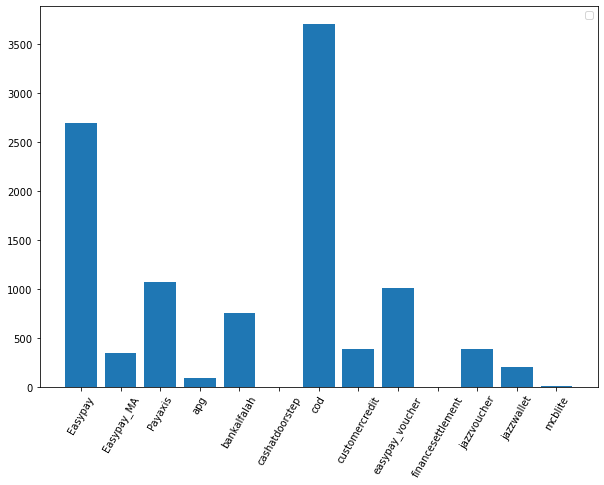

In [173]:
plt.figure(figsize=(10,7))
plt.bar(x=indices, height=agevspayment.unstack(level=0)['payment_method']['Adult'])
plt.xticks(rotation=60)
plt.legend()
plt.plot()

No handles with labels found to put in legend.


[]

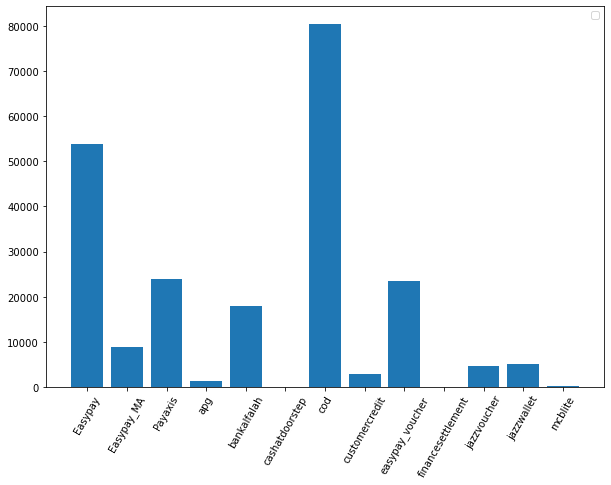

In [174]:
plt.figure(figsize=(10,7))
plt.bar(x=indices, height=agevspayment.unstack(level=0)['payment_method']['Senior'])
plt.xticks(rotation=60)
plt.legend()
plt.plot()

In [28]:
from itertools import combinations
from collections import Counter

count3 = Counter()

for order in dfGrouped['grouped']:
    sub_list = order.split(",")
    count3.update(Counter(combinations(sub_list, 3)))

print(count3.most_common(5))

[(('MATROM59D5F5FAB4036', 'HALWON59F963550067F', 'HALSHO59F82EF537BA1'), 67), (('MATROM59D5F5FAB4036', 'HALWON59F963550067F', 'HALSHO59F866BE82DDE'), 67), (('MATROM59D5F5FAB4036', 'HALSHO59F82EF537BA1', 'HALSHO59F866BE82DDE'), 67), (('HALWON59F963550067F', 'HALSHO59F82EF537BA1', 'HALSHO59F866BE82DDE'), 67), (('MATROM59D5F5FAB4036', 'HALSEV59FABBEBF3E0A', 'HALWON59F963550067F'), 30)]


In [39]:
dfGrouped1 = df[df['order_id'].duplicated(keep=False)]
dfGrouped1 = df.groupby('order_id')
# dfGrouped1 = dfGrouped1[['order_id', 'grouped']].drop_duplicates()

dfGrouped1[]

,item_id,qty_ordered,price,value,discount_amount,total,cust_id,year,ref_num,age,Zip,Discount_Percent
order_id,,,,,,,,,,,,
100354677,1724310.0,6.0,733.9,733.9,0.0,733.9,127455.0,6060,513429,84.0,96126,0.0
100354678,1149546.0,32.0,108.9,1988.0,0.0,1988.0,120248.0,4040,1975734,86.0,147142,0.0
100354679,1149551.0,4.0,306.5,306.5,0.0,306.5,107240.0,4040,1300284,130.0,116402,0.0
100354680,1149556.0,18.0,229.8,1838.4,0.0,1838.4,120248.0,4040,1975734,86.0,147142,0.0
100354681,574781.0,2.0,1099.9,1099.9,0.0,1099.9,56836.0,2020,578084,33.0,96764,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
100562339,905147.0,2.0,77.4,77.4,0.0,77.4,109697.0,2021,444756,47.0,83705,0.0
100562345,905153.0,2.0,29.9,29.9,0.0,29.9,28829.0,2021,336343,23.0,83735,0.0
100562354,905164.0,2.0,77.4,77.4,0.0,77.4,109697.0,2021,444756,47.0,83705,0.0
